In [15]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input
import plotly.express as px

df = px.data.gapminder()

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Dropdown(id='dpdn2', value=['Germany','Brazil'], multi=True,
                 options=[{'label': x, 'value': x} for x in
                          df.country.unique()]),
    html.Div([
        dcc.Graph(id='pie-graph', figure={}, className='six columns'),
        dcc.Graph(id='my-graph', figure={}, clickData=None, hoverData=None,
                  config={
                      'staticPlot': False,     # True, False
                      'scrollZoom': True,      # True, False
                      'doubleClick': 'reset',  # 'reset', 'autosize' or 'reset+autosize', False
                      'showTips': False,       # True, False
                      'displayModeBar': True,  # True, False, 'hover'
                      'watermark': True,
                      # 'modeBarButtonsToAdd': ['pan2d','select2d'],
                        },
                  className='six columns'
                  )
    ])
])


@app.callback(
    Output(component_id='my-graph', component_property='figure'),
    Input(component_id='dpdn2', component_property='value'),
)
def update_graph(country_chosen):
    dff = df[df.country.isin(country_chosen)]
    fig = px.line(data_frame=dff, x='year', y='gdpPercap', color='country',
                  custom_data=['country', 'continent', 'lifeExp', 'pop'])
    fig.update_traces(mode='lines+markers')
    return fig


# Dash version 1.16.0 or higher
@app.callback(
    Output(component_id='pie-graph', component_property='figure'),
    Input(component_id='my-graph', component_property='hoverData'),
    Input(component_id='my-graph', component_property='clickData'),
    Input(component_id='my-graph', component_property='selectedData'),
    Input(component_id='dpdn2', component_property='value')
)
def update_side_graph(hov_data, clk_data, slct_data, country_chosen):
    if hov_data is None:
        dff2 = df[df.country.isin(country_chosen)]
        dff2 = dff2[dff2.year == 1952]
#         print(dff2)
        fig2 = px.pie(data_frame=dff2, values='pop', names='country',
                      title='Population for 1952')
        return fig2
    else:
#         print(f'hover data: {hov_data}')
#         print(hov_data['points'][0]['customdata'][0])
#         print(f'click data: {clk_data}')
#         print(f'selected data: {slct_data}')
        dff2 = df[df.country.isin(country_chosen)]
        hov_year = hov_data['points'][0]['x']
        dff2 = dff2[dff2.year == hov_year]
        fig2 = px.pie(data_frame=dff2, values='pop', names='country', title=f'Population for: {hov_year}')
        return fig2


if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


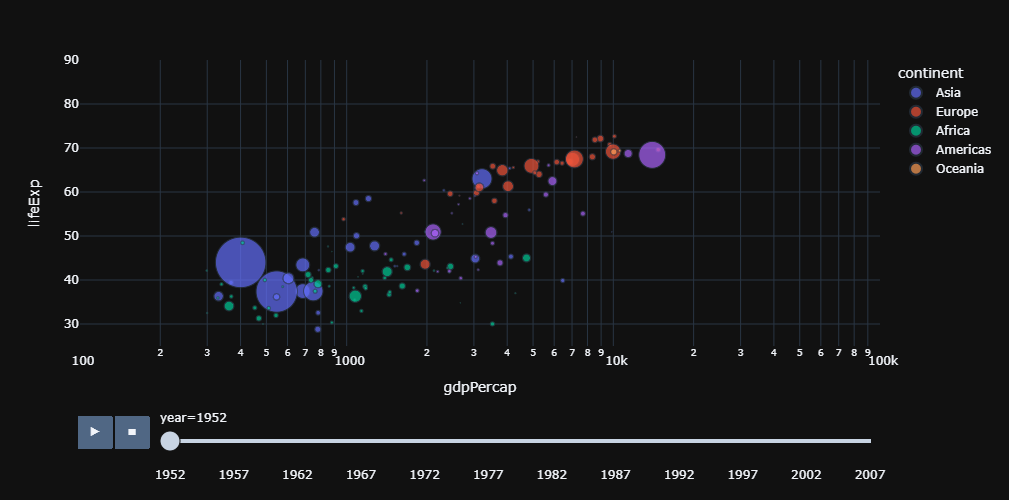

In [11]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.update_layout(template="plotly_dark",
                 autosize=False,
                 height=500,
                 width=1000)
fig.show()

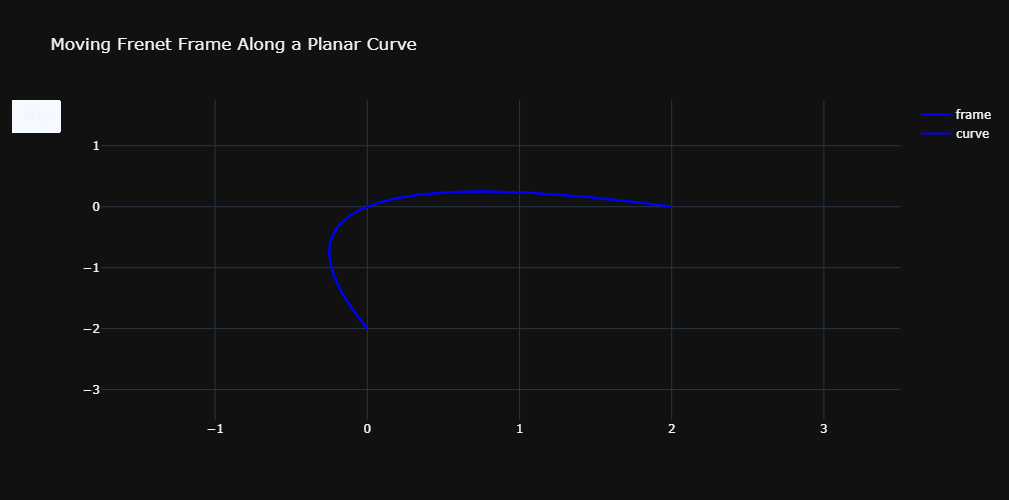

In [13]:
import plotly.graph_objects as go

import numpy as np


# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2
vx = 1 + 2 * s
vy = 1 - 2 * s  # v=(vx, vy) is the velocity
speed = np.sqrt(vx ** 2 + vy ** 2)
ux = vx / speed  # (ux, uy) unit tangent vector, (-uy, ux) unit normal vector
uy = vy / speed

xend = xx + ux  # end coordinates for the unit tangent vector at (xx, yy)
yend = yy + uy

xnoe = xx - uy  # end coordinates for the unit normal vector at (xx,yy)
ynoe = yy + ux


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     name="frame",
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     name="curve",
                     mode="lines",
                     line=dict(width=2, color="blue"))
          ],
    layout=go.Layout(xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
                     yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
                     title="Moving Frenet Frame Along a Planar Curve",
                     hovermode="closest",
                     updatemenus=[dict(type="buttons",
                                       buttons=[dict(label="Play",
                                                     method="animate",
                                                     args=[None])])]),

    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k], xend[k], None, xx[k], xnoe[k]],
            y=[yy[k], yend[k], None, yy[k], ynoe[k]],
            mode="lines",
            line=dict(color="red", width=2))
        ]) for k in range(N)]
)
fig.update_layout(template="plotly_dark",
                 autosize=False,
                 height=500,
                 width=1000)
fig.show()